# Librerias + Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, silhouette_samples

Lea el dataset `bank_marketing`, efectúe un EDA sobre el mismo y luego segmente los clientes.

Pistas:
+ Estructura similar a supervisado, vamos a hacer un EDA, preprocesamos, sacamos modelos, sacamos conclusiones y volvemos a iterar al principio.
+ La última columna es variable TARGET en algunos casos de uso, sería interesante, por ejemplo, segmentar a los clientes y ver que grupo es más parecido a los que están suscritos.
+ Se deben preprocesar los datos en el caso de que se usen modelos basado en distancias.
+ Nótese que cuantas más variables se introducen en un modelo no supervisado, menos explicativo se vuelve el grupo resultante, es nuestra labor nombrar o etiquetar a cada grupo.
+ Se deben utilizar tanto ElbowPlot como SillhouettePlot

In [2]:
df = pd.read_csv('bank_marketing_dataset.csv')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.columns.T

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed', 'Cluster'],
      dtype='object')

### EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

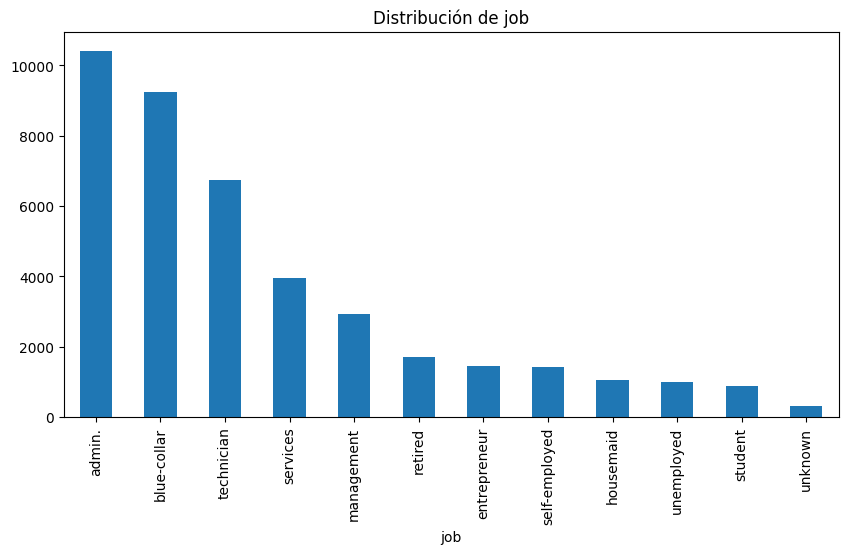


Distribución de marital:
marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: proportion, dtype: float64


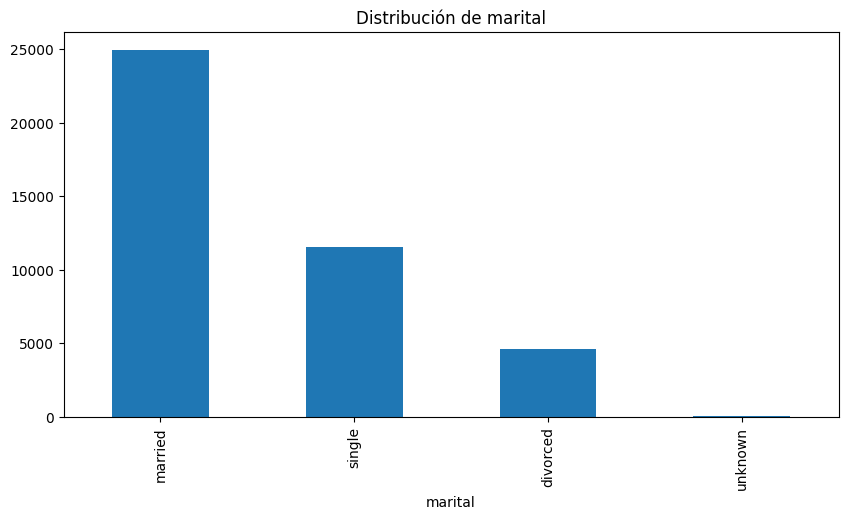


Distribución de education:
education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: proportion, dtype: float64


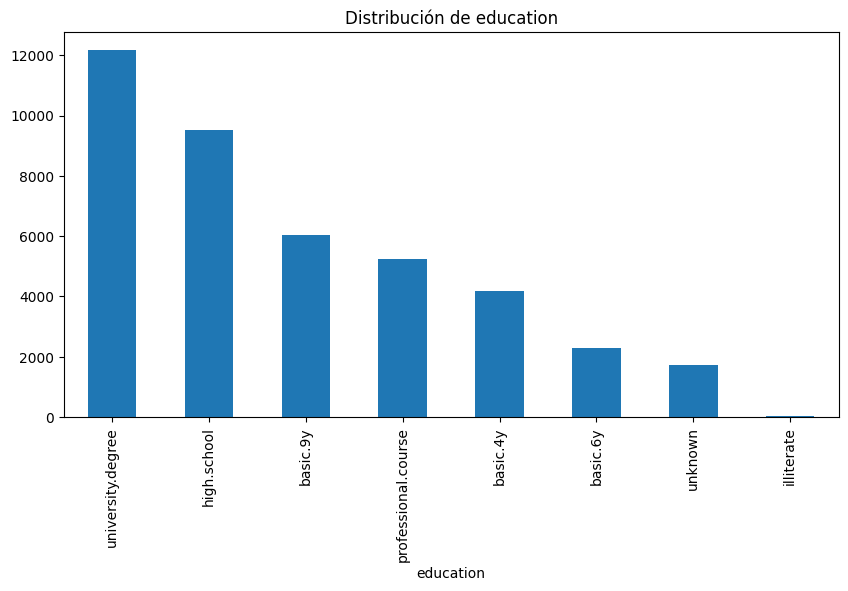


Distribución de default:
default
no         0.791201
unknown    0.208726
yes        0.000073
Name: proportion, dtype: float64


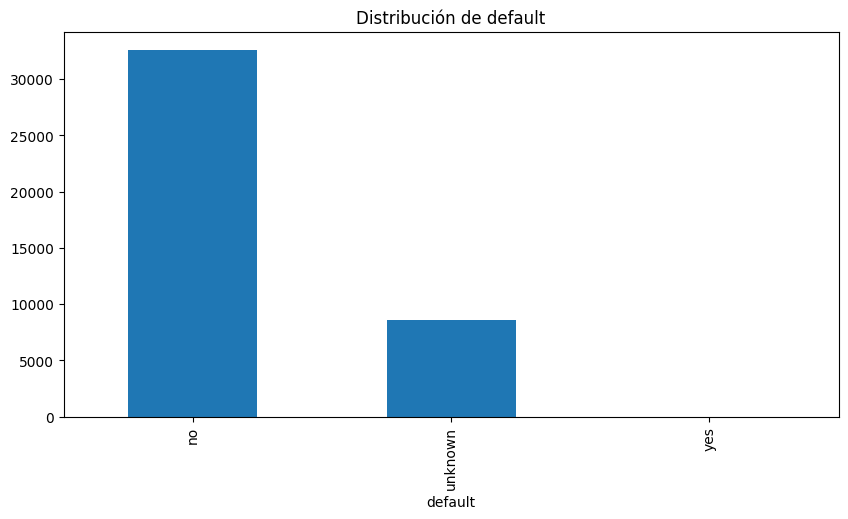


Distribución de housing:
housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: proportion, dtype: float64


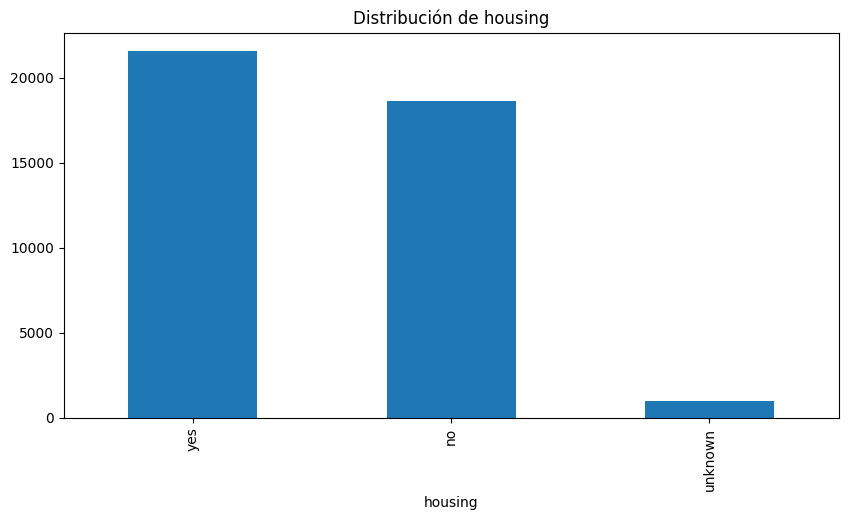


Distribución de loan:
loan
no         0.824269
yes        0.151695
unknown    0.024036
Name: proportion, dtype: float64


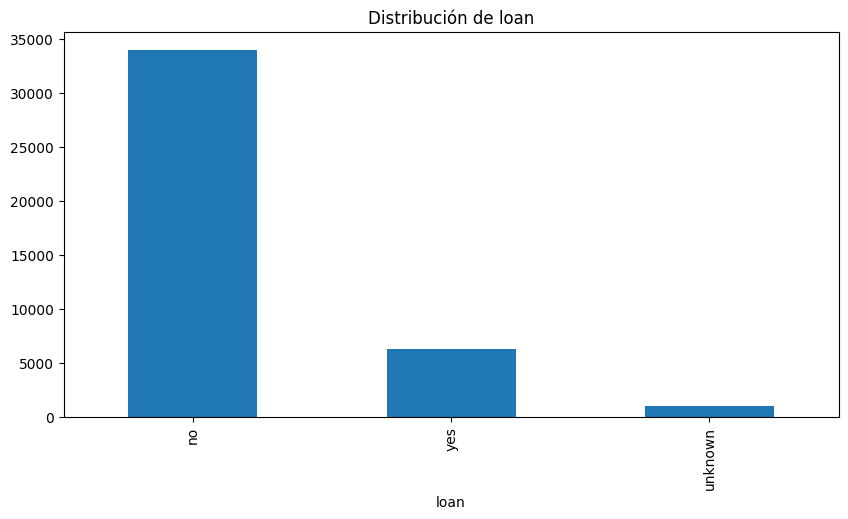


Distribución de contact:
contact
cellular     0.634748
telephone    0.365252
Name: proportion, dtype: float64


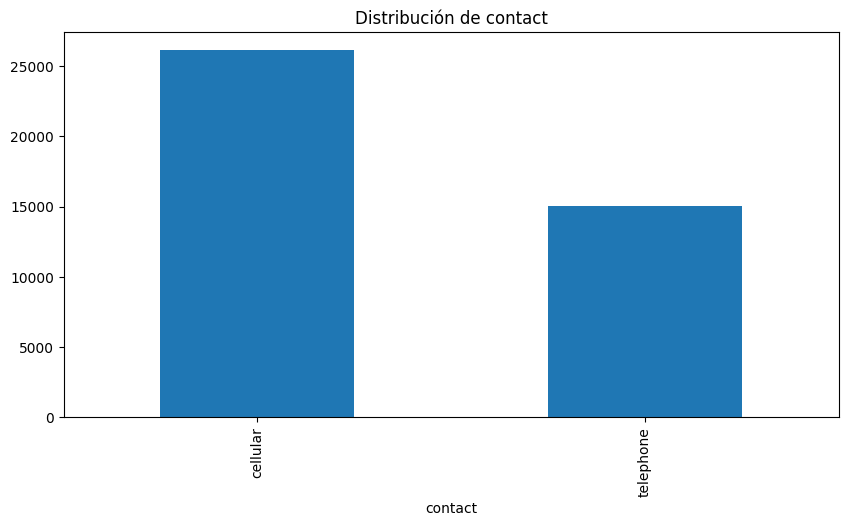


Distribución de month:
month
may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: proportion, dtype: float64


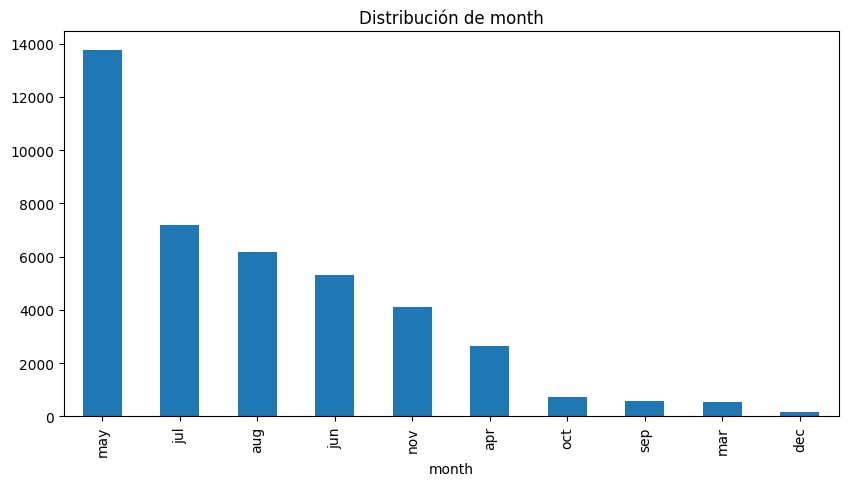


Distribución de day_of_week:
day_of_week
thu    0.209357
mon    0.206711
wed    0.197485
tue    0.196416
fri    0.190031
Name: proportion, dtype: float64


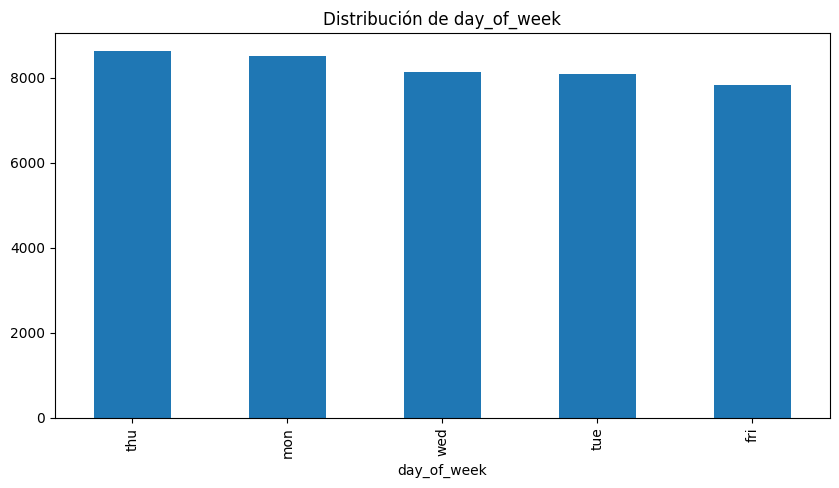


Distribución de poutcome:
poutcome
nonexistent    0.863431
failure        0.103234
success        0.033335
Name: proportion, dtype: float64


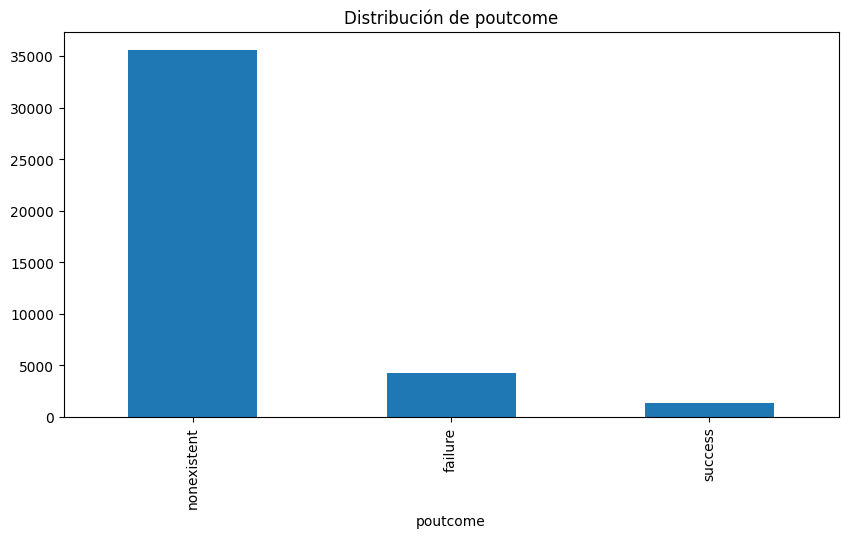


Distribución de subscribed:
subscribed
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


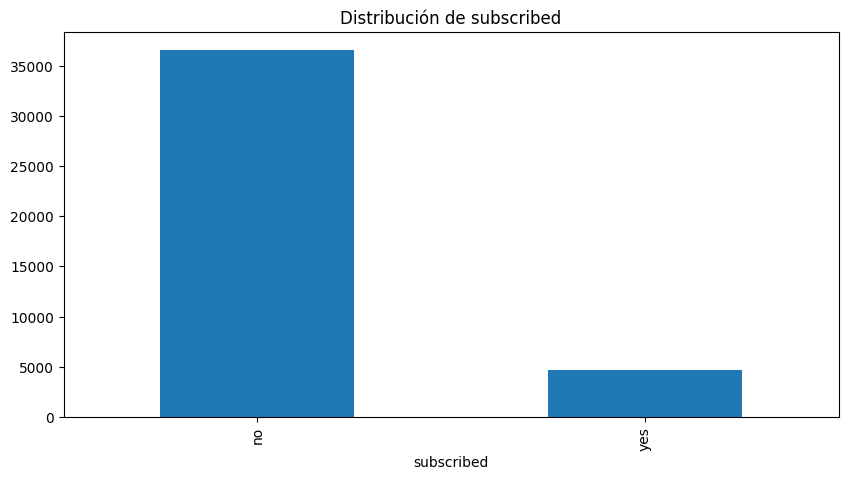

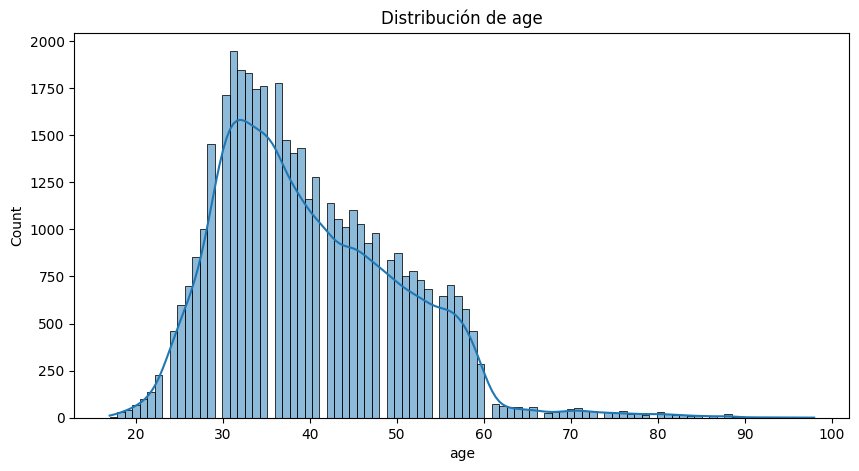

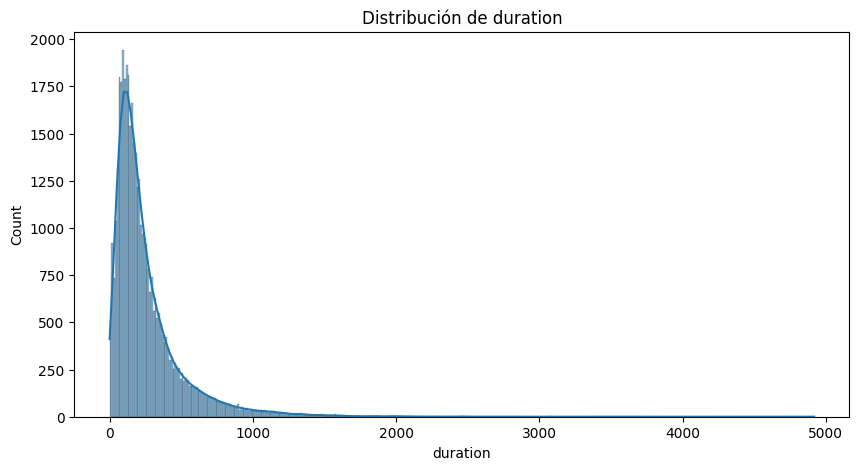

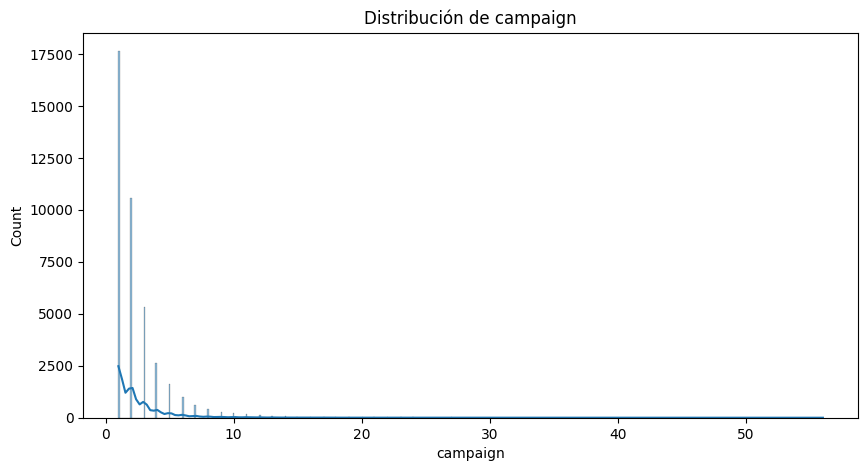

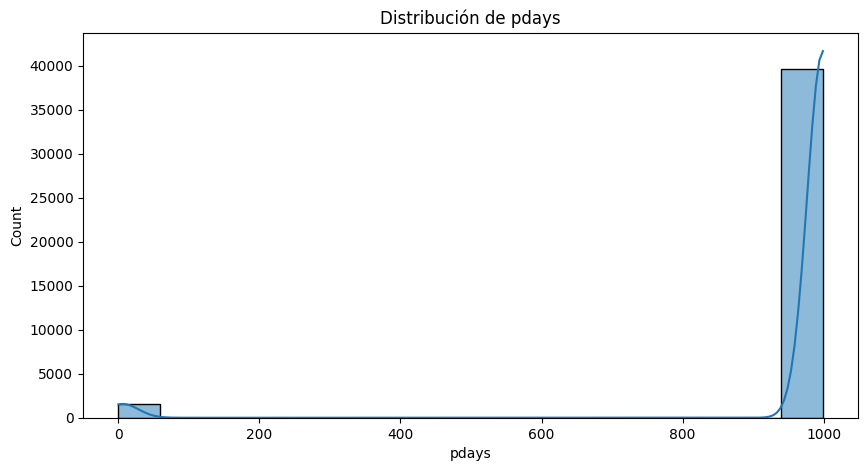

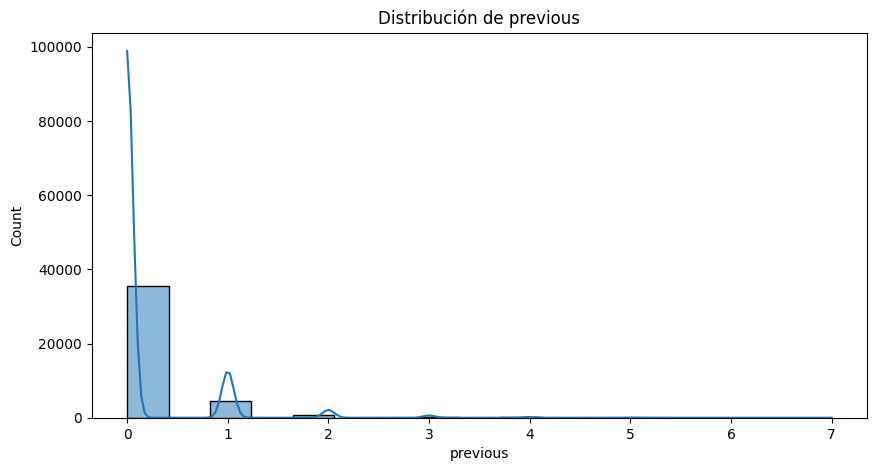

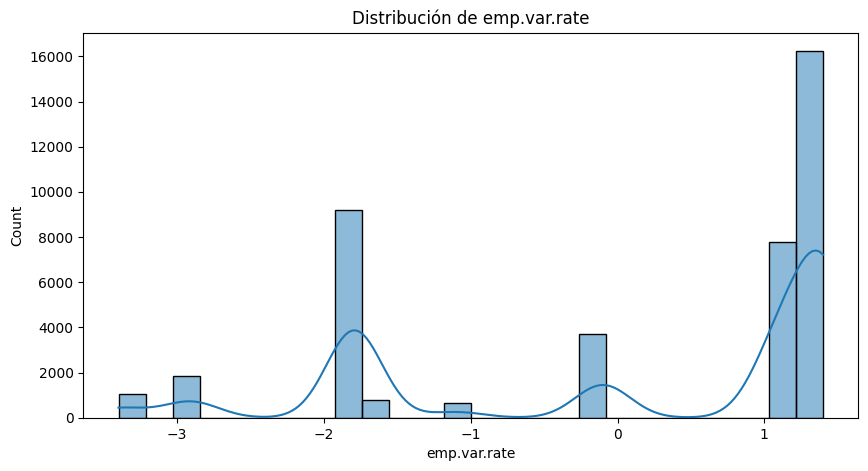

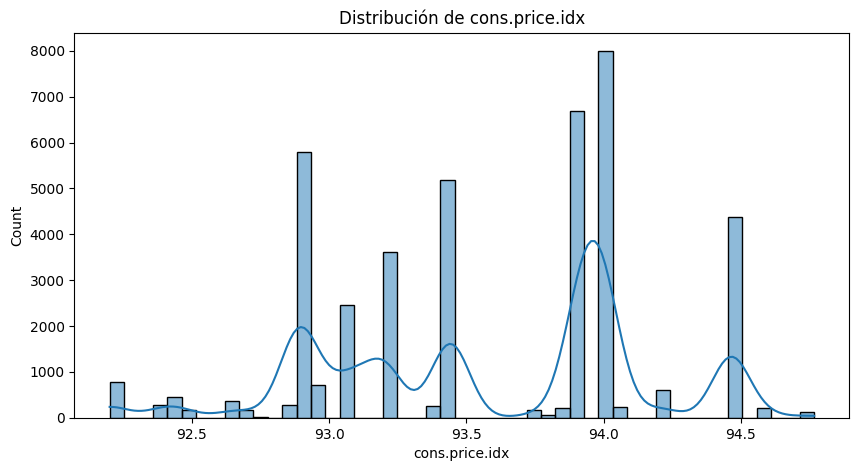

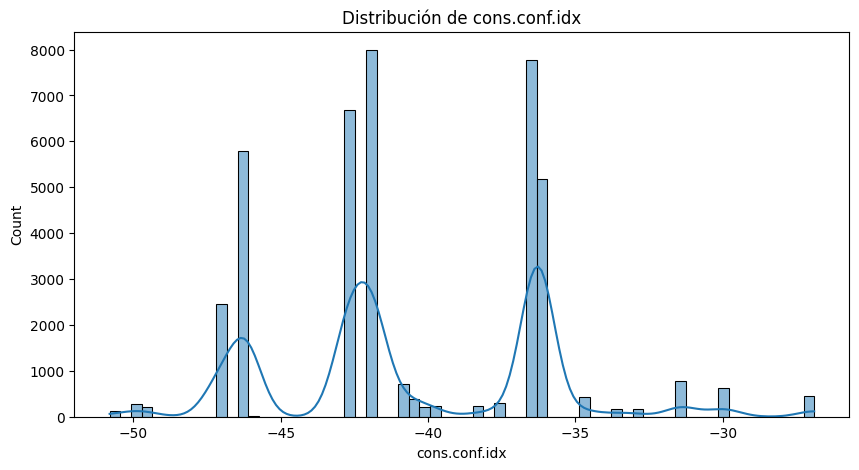

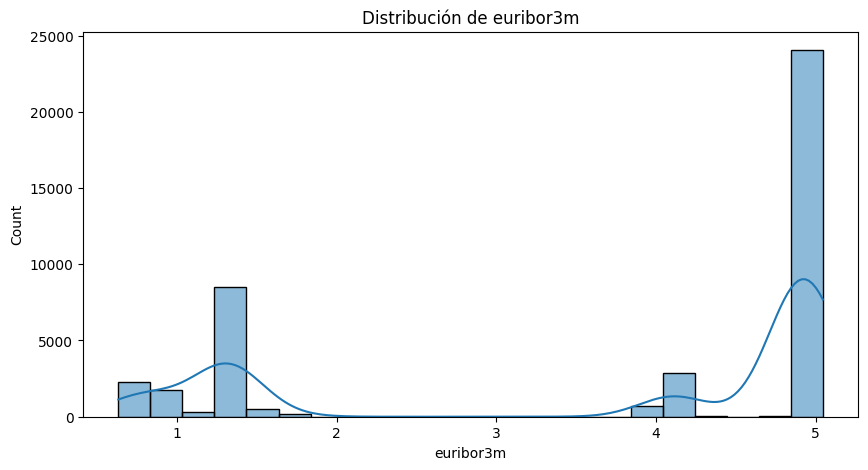

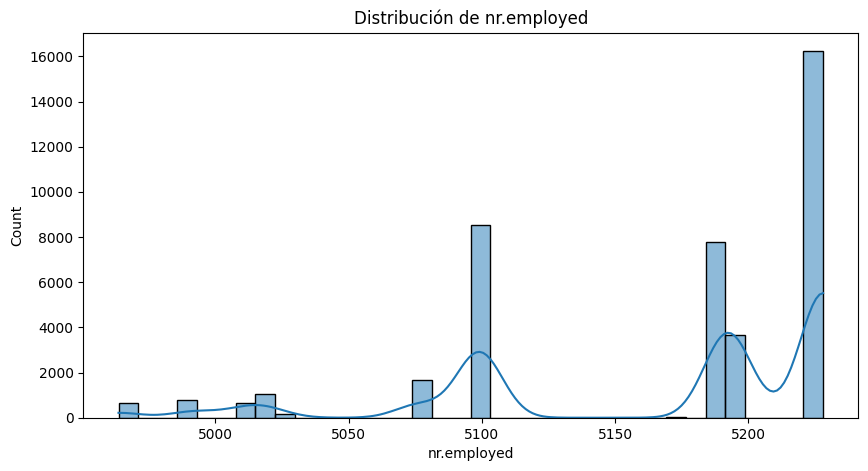

ValueError: could not convert string to float: 'housemaid'

<Figure size 1200x1000 with 0 Axes>

In [3]:
# Información general
print(df.info())
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

# Distribución de variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts(normalize=True))
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribución de {col}")
    plt.show()

# Distribución de variables numéricas
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

## Preprocesamiento de datos:

In [5]:
# Codificación de variables categóricas
df_encoded = pd.get_dummies(df.drop('subscribed', axis=1))

# Escalado de variables numéricas
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

### Ver con Robust Scaler

In [7]:
# PENDING

## Clustering con K-Means:



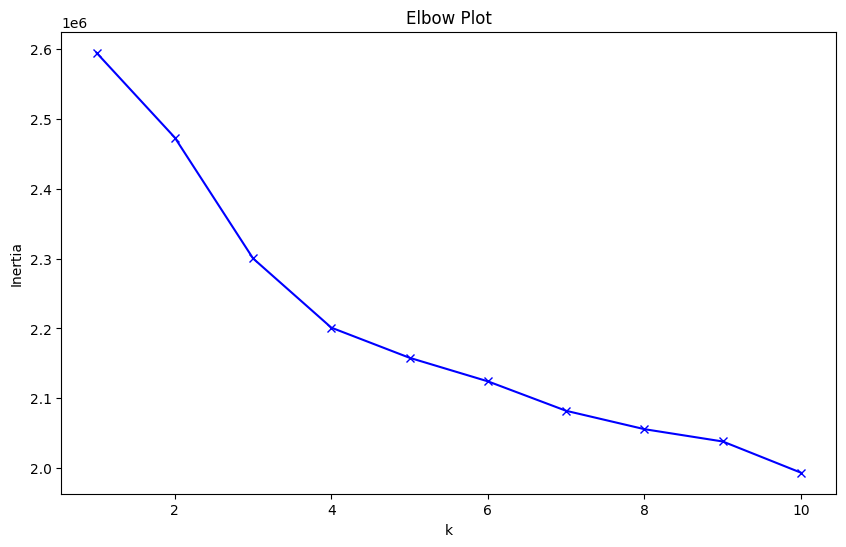

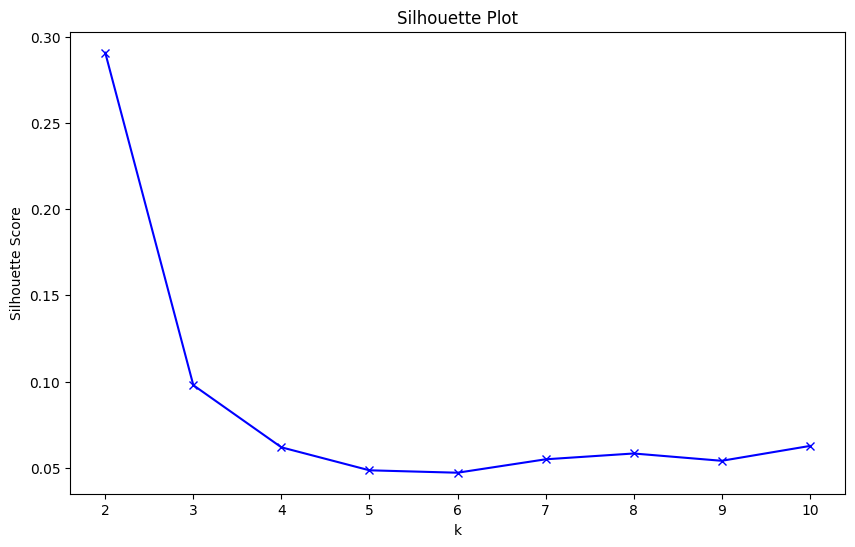

In [6]:
# Elbow Plot
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

# Silhouette Plot
silhouette_scores = []
for k in range(2, 11):  # Empieza desde 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.show()

# Aplicar K-Means con el número óptimo de clusters
optimal_k = 3  # Ajusta esto basándote en los plots anteriores
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

## Análisis de los clusters:




Cluster 0:
                age      duration      campaign    pdays      previous  \
count  15158.000000  15158.000000  15158.000000  15158.0  15158.000000   
mean      39.647315    260.227866      2.071645    999.0      0.303008   
std       11.488087    253.356573      1.616579      0.0      0.535799   
min       17.000000      0.000000      1.000000    999.0      0.000000   
25%       31.000000    104.000000      1.000000    999.0      0.000000   
50%       37.000000    185.000000      2.000000    999.0      0.000000   
75%       46.000000    326.000000      2.000000    999.0      1.000000   
max       98.000000   3785.000000     23.000000    999.0      5.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  15158.000000    15158.000000   15158.000000  15158.000000   
mean      -1.626428       93.031776     -42.936661      1.804226   
std        0.921749        0.409751       5.431803      1.200853   
min       -3.400000       92.201000     -50.80000

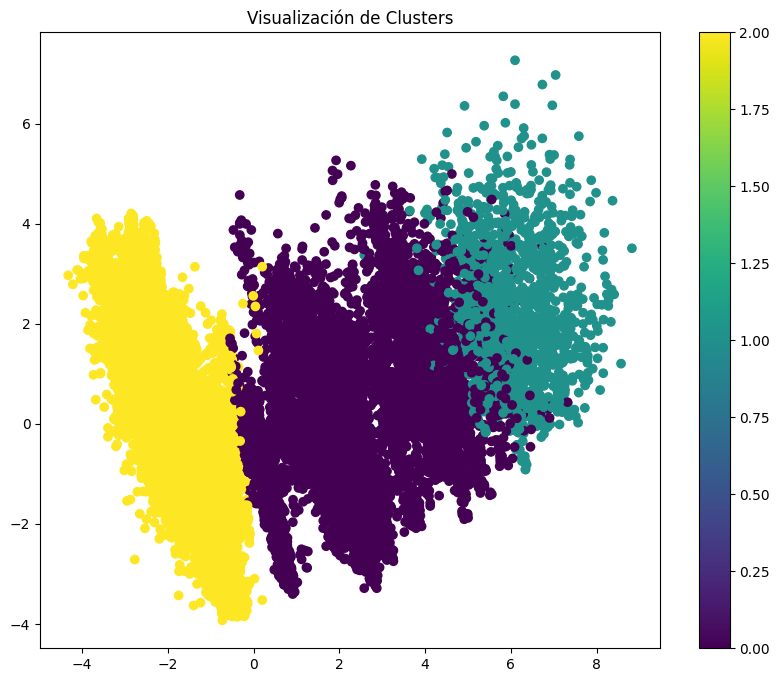

In [9]:
# Características de cada cluster
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    print(df[df['Cluster'] == i].describe())

# Relación entre clusters y suscripción
print(pd.crosstab(df['Cluster'], df['subscribed'], normalize='index'))

# Visualización de clusters (usando las dos primeras características principales)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('Visualización de Clusters')
plt.show()

- __Interpretación y etiquetado de clusters:__  

Basándote en las características predominantes de cada cluster, puedes asignarles etiquetas descriptivas. Por ejemplo:  

    -   Cluster 0: "Jóvenes profesionales"
    -   Cluster 1: "Familias establecidas"
    -   Cluster 2: "Próximos a jubilarse"

- __Iteración: Basándote en los resultados, puedes iterar el proceso:__
    -   Probar diferentes conjuntos de características
    -   Experimentar con otros algoritmos de clustering (e.g., DBSCAN, Hierarchical Clustering)
    -   Ajustar los parámetros del modelo
- __Conclusiones:__
    -   Identifica qué cluster tiene la mayor proporción de clientes suscritos
    -   Describe las características principales de cada cluster
    -   Proporciona recomendaciones basadas en los perfiles de los clusters (e.g., estrategias de marketing personalizadas)

__Diccionario de variables__

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

other attributes:

11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

12 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

13 - previous: number of contacts performed before this campaign and for this client (numeric)

14 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


social and economic context attributes:

15 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

16 - cons.price.idx: consumer price index - monthly indicator (numeric)

17 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

18 - euribor3m: euribor 3 month rate - daily indicator (numeric)

19 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

20 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# EJEMPLO SHILOUTTE

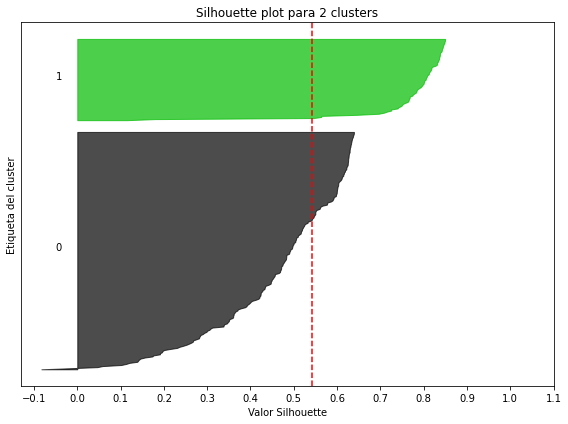

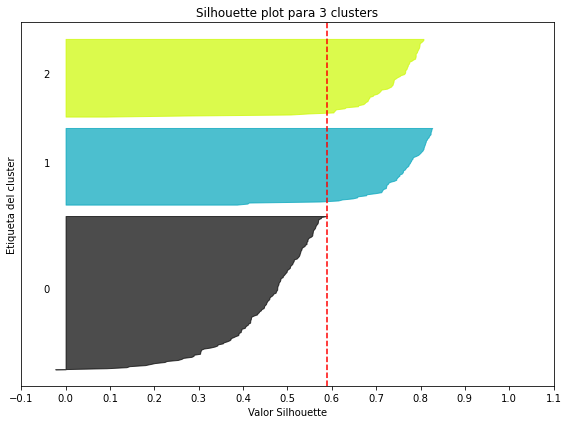

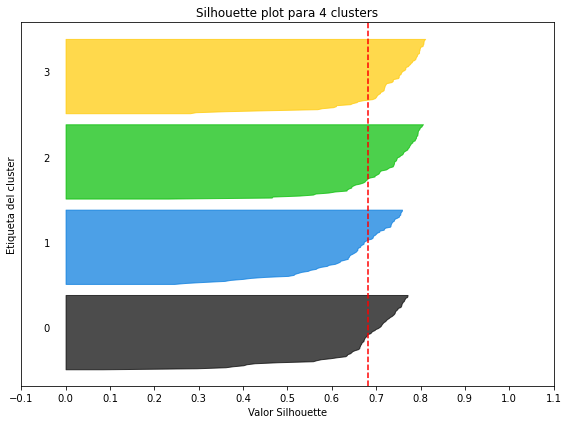

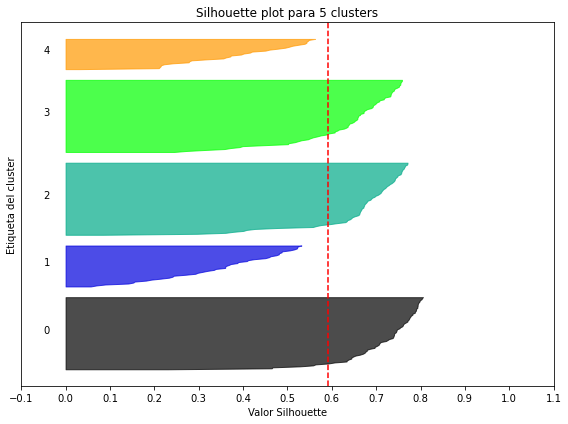

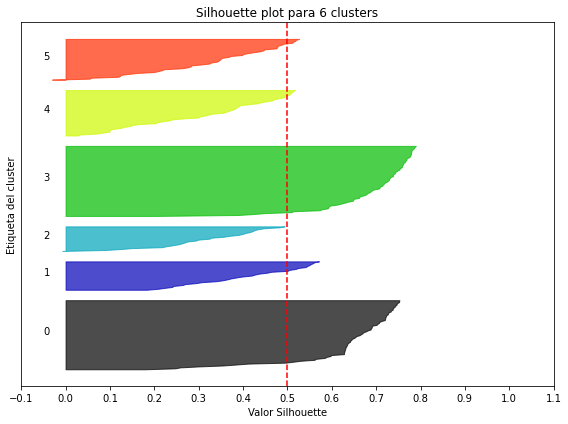

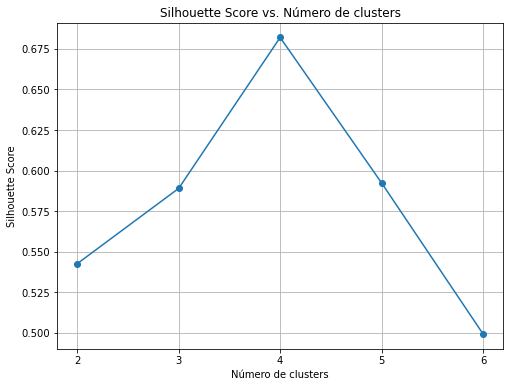

In [32]:
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_samples, silhouette_score

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Lista para almacenar los valores de Silhouette Score
silhouette_scores = []

# Rango de número de clusters a probar
range_n_clusters = [2, 3, 4, 5]

# Calcular el Silhouette Score para diferentes números de clusters
for n_clusters in range_n_clusters:
    # Inicializar y entrenar el modelo de KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # Calcular el Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calcular el valor Silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Crear una subtrama para cada cluster
    plt.figure(figsize=(8, 6))
    plt.title(f"Silhouette plot para {n_clusters} clusters")
    y_lower = 10
    
    for i in range(n_clusters):
        # Agregar valores de Silhouette para cada muestra del cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Color de relleno para cada cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Etiqueta para el cluster en el gráfico
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Actualizar y_lower para el siguiente plot
        y_lower = y_upper + 10
    
    # Etiquetas y línea vertical para el valor promedio de Silhouette
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.xlabel("Valor Silhouette")
    plt.ylabel("Etiqueta del cluster")
    plt.yticks([])  # Limpiar etiquetas del eje y
    plt.xticks(np.arange(-0.1, 1.1, 0.1))
    plt.tight_layout()

# Gráfico de Silhouette Score vs. Número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Número de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()
